### Parte 2 - Classificação Binária

#### (a)

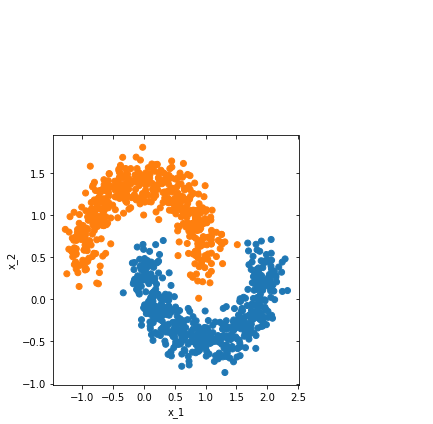

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = pd.read_csv('two_moons.csv',index_col=0)

X = data[['x_1','x_2']].values
y = data.y.values

y_unique = data.y.unique()
replace_map_comp = {k: v for k,v in zip(y_unique,sns.color_palette(n_colors=len(y_unique)))}
colors = [replace_map_comp[a] for a in data.y.values]

   

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X,y)
X_lda = lda.transform(X)

coef = lda.scalings_

x_0 = [min(data.x_1), max(data.x_1)+1]
y_0 = [min(data.x_2), min(data.x_2) - (x_0[1]-x_0[0])*coef[0]/coef[1]]

grid = sns.JointGrid(data.x_1, data.x_2, space=0, height=6, ratio=2)
f = grid.plot_joint(plt.scatter, color=colors)
# f = plt.plot(x_0, y_0, linewidth=2)

# plot the Fisher direction

* Non linear problem
* 

#### (b)
Calcular o coeficiente de fisher

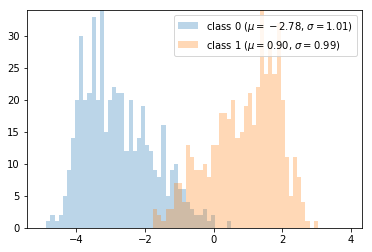

In [30]:
from math import floor, ceil 

X_proj = X.dot(lda.scalings_)
# X_proj = X.dot(np.array([0, 1]))

# the order of the colors for each histogram
colors = sns.color_palette(n_colors=len(y_unique)) #('red', 'green')
bins = np.arange(floor(min(X_proj[:])), ceil(max(X_proj[:])), 0.12)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X_proj[:], bins=bins)[0])

for label,color in zip([0, 1], colors):
    mean = np.mean(X_proj[:][y == label]) # class sample mean
    stdev = np.std(X_proj[:][y == label]) # class standard deviation
    plt.hist(X_proj[:][y == label], bins=bins, alpha=0.3, # opacity level
        label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
        color=color)
plt.ylim([0, max_bin])
plt.legend(loc='upper right')
plt.show()

#### (c) ROC



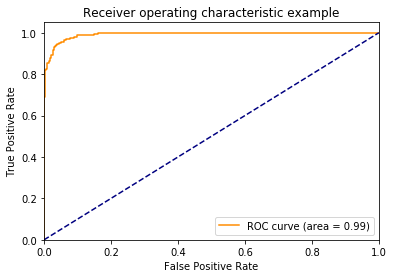

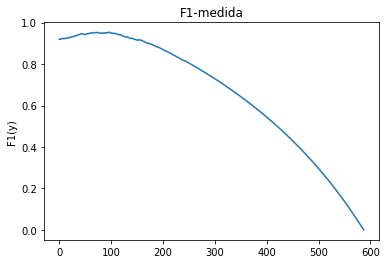

In [54]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
fm = lambda m, precision, recall: ((m+1)*recall*precision)/(recall+m*precision)

fpr, tpr, _ = roc_curve(y, X_proj)
roc_auc = auc(fpr, tpr)

prec, rec, thresholds = precision_recall_curve(y, X_proj)

F1 = fm(1,prec,rec)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.figure()
plt.ylabel('F1(y)')
plt.title('F1-medida')
f = plt.plot(F1)

#### (d)

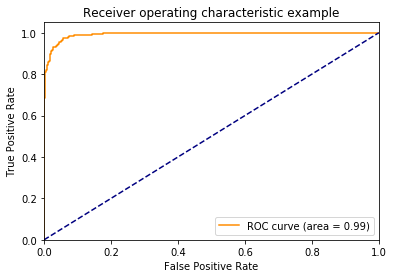

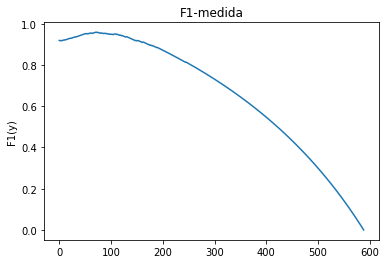

In [68]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)

prob_X = clf.predict_proba(X)[:,1]
prec, rec, thresholds = precision_recall_curve(y, prob_X)
fpr, tpr, _ = roc_curve(y, prob_X)
roc_auc = auc(fpr, tpr)

F1 = fm(1,prec,rec)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.figure()
plt.ylabel('F1(y)')
plt.title('F1-medida')
f = plt.plot(F1)

### Parte 3 - Classificação multi-classe



In [74]:
from sklearn.model_selection import train_test_split

vehicle_data = pd.read_csv('dataset_vehicle.csv')
X = vehicle_data[vehicle_data.columns.drop('Class')].values
y = vehicle_data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

